In [1]:
#!python.exe -m pip install --q git+https://github.com/m-bain/whisperx.git

In [6]:
import whisperx
import gc
import json

C:\Users\Markus\Desktop\welchefolgehack\venv_312\Lib\site-packages\pyannote\audio\core\io.py:43: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


In [7]:
device = "cuda"
batch_size = 4  # reduce if low on GPU mem
compute_type = "float16"  # change to "int8" if low on GPU mem (may reduce accuracy)
language = "de"

In [8]:
audio_file = "Gemischtes_Hack/Gemischtes_Hack_-_252_READY_TO_SHOOT.mp3"
audio_file = "253_1.wav"

In [9]:
audio = whisperx.load_audio(audio_file)

In [80]:
model = whisperx.load_model("large-v2", device=device, compute_type=compute_type, language=language)


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\Markus\.cache\torch\whisperx-vad-segmentation.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.2.0+cu118. Bad things might happen unless you revert torch to 1.x.


In [11]:
#result_whisperx = model.transcribe(audio, batch_size=batch_size, language=language)
#del model
#print(result_whisper["segments"]) # before alignment

# delete model if low on GPU resources
import gc

gc.collect()
import torch;

torch.cuda.empty_cache()

# todo load other good whisper segments here to give to whisperx.align(...)
with open("text/Gemischtes_Hack_-_253_JURASSIC_QUARK.txt", "r") as f:
    content = f.read()

text_json = json.loads(content)

# 2. Align whisper output
model_a, metadata = whisperx.load_align_model(language_code="de", device=device)
result_align = whisperx.align(text_json["segments"][0], model_a, metadata, audio, device, return_char_alignments=False)
result_align_backup = result_align


Failed to align segment (" Ja, die Frage krieg ich auch so oft, woher kennt ihr euch eigentlich?"): backtrack failed, resorting to original...
Failed to align segment (" Genau, und jetzt schlägt natürlich, jetzt will ich mal hier laut denken, sollte man irgendwann mal wieder bei diesen grundsätzlichen Dingen bei null anfangen, weil ja viele neue Hörerinnen und Hörer dazugekommen sind, oder soll man einfach es voraussetzen und sagen, hör es dir an von Beginn an?"): original start time longer than audio duration, skipping...
Failed to align segment (" Weil ich finde immer so, manchmal gibt es diese künstlerische Arroganz, kennst du das, wenn Leute, irgendwie keine Ahnung, sind Musiker oder so, gehen auf die Eins oder Zwei oder Drei und dann sagen dann irgendwie so Sachen wie, das haben wir hier gemeinsam geschafft und so, und ich immer so, ja, weiß ich nicht, ob wir das gemeinsam geschafft haben, eigentlich haben die einfach deine Platte gekauft oder deinen Streaming angehört oder so, eg

In [32]:
result_align

{'segments': [{'start': 0.581,
   'end': 8.796,
   'text': ' Würdest du lieber gegen einen riesengroßen Entenmann kämpfen oder gegen 500 kleine Pferde?',
   'words': [{'word': 'Würdest', 'start': 0.581, 'end': 1.002, 'score': 0.601},
    {'word': 'du', 'start': 1.022, 'end': 1.282, 'score': 0.71},
    {'word': 'lieber', 'start': 1.302, 'end': 2.164, 'score': 0.654},
    {'word': 'gegen', 'start': 2.204, 'end': 2.845, 'score': 0.937},
    {'word': 'einen', 'start': 2.945, 'end': 4.188, 'score': 0.588},
    {'word': 'riesengroßen', 'start': 4.288, 'end': 5.63, 'score': 0.909},
    {'word': 'Entenmann', 'start': 5.71, 'end': 6.712, 'score': 0.906},
    {'word': 'kämpfen', 'start': 6.752, 'end': 7.514, 'score': 0.827},
    {'word': 'oder', 'start': 7.554, 'end': 7.894, 'score': 0.878},
    {'word': 'gegen', 'start': 7.934, 'end': 8.195, 'score': 0.916},
    {'word': '500'},
    {'word': 'kleine', 'start': 8.235, 'end': 8.475, 'score': 0.243},
    {'word': 'Pferde?', 'start': 8.515, 'end': 

In [13]:
display(text_json["segments"][0][0])

{'id': 1,
 'seek': 2654,
 'start': 0.0,
 'end': 11.02,
 'text': ' Würdest du lieber gegen einen riesengroßen Entenmann kämpfen oder gegen 500 kleine Pferde?',
 'tokens': [50364,
  43846,
  23748,
  1581,
  38252,
  13953,
  4891,
  23932,
  1501,
  340,
  8989,
  3951,
  268,
  14912,
  16563,
  45316,
  4513,
  13953,
  5923,
  22278,
  430,
  612,
  1479,
  30,
  50952],
 'temperature': 0.0,
 'avg_logprob': -0.29613095699321657,
 'compression_ratio': 1.407079646017699,
 'no_speech_prob': 0.0279693603515625,
 'words': [{'start': 0.0,
   'end': 0.88,
   'word': ' Würdest',
   'probability': 0.74072265625},
  {'start': 0.88, 'end': 1.12, 'word': ' du', 'probability': 0.84423828125},
  {'start': 1.12, 'end': 1.66, 'word': ' lieber', 'probability': 0.7080078125},
  {'start': 1.66, 'end': 2.46, 'word': ' gegen', 'probability': 0.658203125},
  {'start': 2.46, 'end': 3.26, 'word': ' einen', 'probability': 0.61083984375},
  {'start': 3.26,
   'end': 5.44,
   'word': ' riesengroßen',
   'proba

In [14]:
from dotenv import load_dotenv
import os
load_dotenv()
hf_auth_token = os.getenv("HF_AUTH_TOKEN")
diarize_model = whisperx.DiarizationPipeline(
    use_auth_token=hf_auth_token,
    device=device
)

In [15]:
diarize_segments = diarize_model(audio, num_speakers=2)

In [26]:
print(diarize_segments.head())
print(diarize_segments.describe())
print(diarize_segments.columns)
display(diarize_segments)

                             segment label     speaker      start        end
0  [ 00:00:00.008 -->  00:00:03.438]     A  SPEAKER_00   0.008489   3.438031
1  [ 00:00:03.964 -->  00:00:11.196]     B  SPEAKER_00   3.964346  11.196944
2  [ 00:00:11.977 -->  00:00:55.492]     C  SPEAKER_00  11.977929  55.492360
3  [ 00:00:24.660 -->  00:00:25.492]     D  SPEAKER_01  24.660441  25.492360
4  [ 00:00:33.471 -->  00:00:35.186]     E  SPEAKER_01  33.471986  35.186757
            start         end
count   41.000000   41.000000
mean   101.616009  106.343327
std     50.312177   49.356587
min      0.008489    3.438031
25%     58.446520   70.059423
50%    118.140917  119.023769
75%    137.139219  137.156197
max    186.680815  187.410866
Index(['segment', 'label', 'speaker', 'start', 'end'], dtype='object')


,segment,label,speaker,start,end
0,[ 00:00:00.008 --> 00:00:03.438],A,SPEAKER_00,0.008489,3.438031
1,[ 00:00:03.964 --> 00:00:11.196],B,SPEAKER_00,3.964346,11.196944
2,[ 00:00:11.977 --> 00:00:55.492],C,SPEAKER_00,11.977929,55.492360
3,[ 00:00:24.660 --> 00:00:25.492],D,SPEAKER_01,24.660441,25.492360
4,[ 00:00:33.471 --> 00:00:35.186],E,SPEAKER_01,33.471986,35.186757
5,[ 00:00:50.178 --> 00:00:51.061],F,SPEAKER_01,50.178268,51.061121
6,[ 00:00:55.492 --> 00:00:55.577],G,SPEAKER_01,55.492360,55.577250
7,[ 00:00:55.577 --> 00:00:56.001],H,SPEAKER_00,55.577250,56.001698
8,[ 00:00:56.001 --> 00:00:58.310],I,SPEAKER_01,56.001698,58.310696
9,[ 00:00:58.310 --> 00:00:58.327],J,SPEAKER_00,58.310696,58.327674


In [35]:
import numpy as np

transcript_segments = text_json["segments"][0]
fill_nearest = False


def default_speaker_assign(segments):
    for seg in segments:
        # assign speaker to segment (if any)
        diarize_segments['intersection'] = np.minimum(diarize_segments['end'], seg['end']) - np.maximum(
            diarize_segments['start'],
            seg['start'])
        diarize_segments['union'] = np.maximum(diarize_segments['end'], seg['end']) - np.minimum(
            diarize_segments['start'], seg['start'])
        # remove no hit, otherwise we look for closest (even negative intersection...)
        if not fill_nearest:
            dia_tmp = diarize_segments[diarize_segments['intersection'] > 0]
        else:
            dia_tmp = diarize_segments
        if len(dia_tmp) > 0:
            # sum over speakers
            speaker = dia_tmp.groupby("speaker")["intersection"].sum().sort_values(ascending=False).index[0]
            seg["speaker"] = speaker

        # assign speaker to words
        if 'words' in seg:
            for word in seg['words']:
                if 'start' in word:
                    diarize_segments['intersection'] = np.minimum(diarize_segments['end'], word['end']) - np.maximum(
                        diarize_segments['start'], word['start'])
                    diarize_segments['union'] = np.maximum(diarize_segments['end'], word['end']) - np.minimum(
                        diarize_segments['start'],
                        word['start'])
                    # remove no hit
                    if not fill_nearest:
                        dia_tmp = diarize_segments[diarize_segments['intersection'] > 0]
                    else:
                        dia_tmp = diarize_segments
                    if len(dia_tmp) > 0:
                        # sum over speakers
                        speaker = dia_tmp.groupby("speaker")["intersection"].sum().sort_values(ascending=False).index[0]
                        word["speaker"] = speaker


# Convert diarization timestamps from HH:MM:SS to seconds for easier comparison
def convert_to_seconds(time_str):
    h, m, s = map(float, time_str.split(':'))
    return h * 3600 + m * 60 + s


def assign_speaker(transcript_segment, diarization_df):
    start_time = transcript_segment['start']
    # Look for diarization segments that start within +-0.5 seconds of the transcript segment start time
    potential_speakers = diarization_df[
        (diarization_df['start'] >= start_time - 0.5) & (diarization_df['start'] <= start_time + 0.5)]
    if not potential_speakers.empty:
        # If there are multiple potential speakers, choose the one with the closest start time to the transcript segment's start time
        closest_speaker = potential_speakers.iloc[(potential_speakers['start'] - start_time).abs().argsort()[:1]]
        return closest_speaker['speaker'].values[0]
    return None  # Return None if no matching speaker is found


tmp = [sss for sss in result_align]

default_speaker_assign(transcript_segments)
default_speaker_assign(result_align["segments"])

# Assign speakers to each transcript segment based on the nearest diarization segment start time
for segment in transcript_segments:
    segment['speaker_alt'] = assign_speaker(segment, diarize_segments)

for segment in result_align["segments"]:
    segment['speaker_alt'] = assign_speaker(segment, diarize_segments)

for s in result_align["segments"]:
    speaker = s.get("speaker")
    speaker_alt = s.get("speaker_alt")

    if speaker_alt is None:
        speaker_alt = "Unknown"
    else:
        speaker_alt = "Felix" if s.get("speaker_alt") == "SPEAKER_00" else "Tommi"

    if speaker is None:
        speaker = "Unknown"
    else:
        speaker = "Felix" if s.get("speaker") == "SPEAKER_00" else "Tommi"

    if speaker == speaker_alt:
        continue

    print(f"[{s['start']}:{s['end']}]\t=> {speaker}/{speaker_alt}:\t{s['text']}")

KeyboardInterrupt: 

In [73]:
diarize_segments.speaker.unique()

array(['SPEAKER_00', 'SPEAKER_01'], dtype=object)

In [60]:
from pydub import AudioSegment
import os


def save_diarized_segments(audio_path, diarize_df, output_dir="audio_segs"):
    # Load the full audio file
    audio = AudioSegment.from_file(audio_path)

    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate over the diarization DataFrame and save each segment
    for index, row in diarize_df.iterrows():
        start_ms = row['start'] * 1000  # Convert start time to milliseconds
        end_ms = row['end'] * 1000  # Convert end time to milliseconds
        segment_audio = audio[start_ms:end_ms]  # Extract the segment

        # Create a filename for the segment
        segment_filename = f"{os.getcwd()}/{output_dir}/{index}_{row['start']}_{row['end']}_{row['speaker']}.wav"

        # Export the segment to a file
        segment_audio.export(segment_filename, format="wav")
        print(f"Segment saved: {segment_filename}")


# Example usage:
# Assuming `diarize_df` is your DataFrame and 'path/to/your/audio_file.wav' is the path to your audio file
save_diarized_segments(audio_file, diarize_segments)


Segment saved: C:\Users\Markus\Desktop\welchefolgehack/audio_segs/0_0.008488964346349746_3.4380305602716468_SPEAKER_00.wav
Segment saved: C:\Users\Markus\Desktop\welchefolgehack/audio_segs/1_3.9643463497453313_11.196943972835316_SPEAKER_00.wav
Segment saved: C:\Users\Markus\Desktop\welchefolgehack/audio_segs/2_11.977928692699491_55.492359932088284_SPEAKER_00.wav
Segment saved: C:\Users\Markus\Desktop\welchefolgehack/audio_segs/3_24.660441426146015_25.492359932088284_SPEAKER_01.wav
Segment saved: C:\Users\Markus\Desktop\welchefolgehack/audio_segs/4_33.47198641765704_35.18675721561969_SPEAKER_01.wav
Segment saved: C:\Users\Markus\Desktop\welchefolgehack/audio_segs/5_50.178268251273344_51.06112054329372_SPEAKER_01.wav
Segment saved: C:\Users\Markus\Desktop\welchefolgehack/audio_segs/6_55.492359932088284_55.57724957555178_SPEAKER_01.wav
Segment saved: C:\Users\Markus\Desktop\welchefolgehack/audio_segs/7_55.57724957555178_56.00169779286927_SPEAKER_00.wav
Segment saved: C:\Users\Markus\Deskt

In [75]:
#result = whisperx.assign_word_speakers(diarize_segments, result_align)
result2 = whisperx.assign_word_speakers(diarize_segments, result_align_new)

print(diarize_segments)
print(result2["segments"])  # segments are now assigned speaker IDs

                              segment label     speaker       start  \
0   [ 00:00:00.008 -->  00:00:03.438]     A  SPEAKER_00    0.008489   
1   [ 00:00:03.964 -->  00:00:11.196]     B  SPEAKER_00    3.964346   
2   [ 00:00:11.977 -->  00:00:55.492]     C  SPEAKER_00   11.977929   
3   [ 00:00:24.660 -->  00:00:25.492]     D  SPEAKER_01   24.660441   
4   [ 00:00:33.471 -->  00:00:35.186]     E  SPEAKER_01   33.471986   
5   [ 00:00:50.178 -->  00:00:51.061]     F  SPEAKER_01   50.178268   
6   [ 00:00:55.492 -->  00:00:55.577]     G  SPEAKER_01   55.492360   
7   [ 00:00:55.577 -->  00:00:56.001]     H  SPEAKER_00   55.577250   
8   [ 00:00:56.001 -->  00:00:58.310]     I  SPEAKER_01   56.001698   
9   [ 00:00:58.310 -->  00:00:58.327]     J  SPEAKER_00   58.310696   
10  [ 00:00:58.446 -->  00:01:10.059]     K  SPEAKER_00   58.446520   
11  [ 00:01:09.329 -->  00:01:10.263]     L  SPEAKER_01   69.329372   
12  [ 00:01:10.263 -->  00:01:10.500]     M  SPEAKER_00   70.263158   
13  [ 

In [62]:
result

{'segments': [{'start': 0.581,
   'end': 8.796,
   'text': ' Würdest du lieber gegen einen riesengroßen Entenmann kämpfen oder gegen 500 kleine Pferde?',
   'words': [{'word': 'Würdest',
     'start': 0.581,
     'end': 1.002,
     'score': 0.594,
     'speaker': 'SPEAKER_00'},
    {'word': 'du',
     'start': 1.022,
     'end': 1.282,
     'score': 0.71,
     'speaker': 'SPEAKER_00'},
    {'word': 'lieber',
     'start': 1.302,
     'end': 2.164,
     'score': 0.654,
     'speaker': 'SPEAKER_00'},
    {'word': 'gegen',
     'start': 2.204,
     'end': 2.845,
     'score': 0.936,
     'speaker': 'SPEAKER_00'},
    {'word': 'einen',
     'start': 2.945,
     'end': 4.188,
     'score': 0.588,
     'speaker': 'SPEAKER_00'},
    {'word': 'riesengroßen',
     'start': 4.288,
     'end': 5.63,
     'score': 0.908,
     'speaker': 'SPEAKER_00'},
    {'word': 'Entenmann',
     'start': 5.71,
     'end': 6.712,
     'score': 0.906,
     'speaker': 'SPEAKER_00'},
    {'word': 'kämpfen',
     's

In [77]:
import numpy as np
import pandas as pd


def my_assign_word_speakers_modified(diarize_df, transcript_result, threshold=1000):
    transcript_segments = transcript_result["segments"]
    for seg in transcript_segments:
        if "irgendwas" in seg["text"]:
            #print(seg["text"])
            pass

        # Calculate the closest speaker for the segment
        diarize_df['time_difference'] = np.abs(diarize_df['start'] - seg['start'])
        closest_speakers = diarize_df[(diarize_df['time_difference'] <= threshold)]

        if not closest_speakers.empty:
            closest_speaker = closest_speakers.loc[closest_speakers['time_difference'].idxmin()]['speaker']
            seg["speaker"] = closest_speaker

        # Assign speaker to words
        if 'words' in seg:
            for word in seg['words']:
                if 'start' in word:
                    diarize_df['time_difference'] = np.abs(diarize_df['start'] - word['start'])
                    closest_speakers = diarize_df[(diarize_df['time_difference'] <= threshold)]

                    if not closest_speakers.empty:
                        closest_speaker = closest_speakers.loc[closest_speakers['time_difference'].idxmin()]['speaker']
                        word["speaker"] = closest_speaker

    return transcript_result


#align_bb = result_align_backup
#result_alt = my_assign_word_speakers_modified(diarize_segments, result_align_backup)

# print(diarize_segments)
# print(result["segments"])

for s in result["segments"]:
    speaker = "Felix" if s.get("speaker") == "SPEAKER_00" else "Tommi"
    #speaker2 = "Felix" if s2.get("speaker") == "SPEAKER_00" else "Tommi"

    # if s.get("speaker") == "SPEAKER_00":
    #   continue
    # print(s)
    print(f"[{s['start']}:{s['end']}]\t=> {speaker}:\t{s['text']}")

print("----------------------------")

for s in result2["segments"]:
    speaker = "Felix" if s.get("speaker") == "SPEAKER_00" else "Tommi"
    #speaker2 = "Felix" if s2.get("speaker") == "SPEAKER_00" else "Tommi"

    # if s.get("speaker") == "SPEAKER_00":
    #   continue
    # print(s)
    print(f"[{s['start']}:{s['end']}]\t=> {speaker}:\t{s['text']}")


[0.581:8.796]	=> Felix:	 Würdest du lieber gegen einen riesengroßen Entenmann kämpfen oder gegen 500 kleine Pferde?
[11.92:26.44]	=> Felix:	 Das, meine Damen und Herren, waren die ganz Lustigen unter euch, die hier nicht mitarbeiten bei unserer Spezialfolge Gemischtes Hack, wo wir uns die Mühe machen, uns von euch Fragen einzuholen und diese dann zu beantworten,
[27.061:36.94]	=> Felix:	 die dann nicht mitarbeiten, sondern dann mit so einem gequirlten Affenkack daherkommen und da muss man einfach auch mal die Leute wieder erziehen.
[37.641:48.238]	=> Felix:	 Ich werde weder gegen ein Pferdegroßes Ente noch gegen ein Entengroßes Pferde kämpfen und das ist auch nicht lustig und wenn das lustig war, dann allerspätestens seit 2012 nicht mehr.
[50.542:52.191]	=> Felix:	 Warum seit 2012, fragt ihr euch jetzt?
[52.211:52.674]	=> Felix:	Weiß ich nicht.
[52.714:53.217]	=> Felix:	Ist einfach so.
[53.257:53.358]	=> Felix:	Egal.
[54.563:58.119]	=> Tommi:	 Weil da der große Fight war zwischen den k

In [23]:
 for s in result["word_segments"]:
    #print(s)
    speaker = "Felix" if s.get("speaker") == "SPEAKER_00" else "Tommi"
    # if s.get("speaker") == "SPEAKER_00":
    #   continue
    # print(s)
    start = s.get("start")
    end = s.get("end")
    score = s.get("score")
    word = s.get("word")
    #if score is not None:
    # speaker = speaker if score > 0.5 else "Felix!" if speaker == "Tommi" else "Tommi!"
    print(f"[{start}:{end}]\t=> {speaker} ({score}):\t{word}")

[0.581:1.002]	=> Felix (0.601):	Würdest
[1.022:1.282]	=> Felix (0.71):	du
[1.302:2.164]	=> Felix (0.654):	lieber
[2.204:2.845]	=> Felix (0.937):	gegen
[2.945:4.188]	=> Felix (0.588):	einen
[4.288:5.63]	=> Felix (0.909):	riesengroßen
[5.71:6.712]	=> Felix (0.906):	Entenmann
[6.752:7.514]	=> Felix (0.827):	kämpfen
[7.554:7.894]	=> Felix (0.878):	oder
[7.934:8.195]	=> Felix (0.916):	gegen
[None:None]	=> Tommi (None):	500
[8.235:8.475]	=> Felix (0.243):	kleine
[8.515:8.796]	=> Felix (0.383):	Pferde?
[11.92:12.361]	=> Felix (0.492):	Das,
[12.901:13.182]	=> Felix (0.333):	meine
[13.222:13.542]	=> Felix (0.786):	Damen
[13.582:13.742]	=> Felix (0.928):	und
[13.783:14.564]	=> Felix (0.823):	Herren,
[14.864:15.104]	=> Felix (0.552):	waren
[15.124:15.245]	=> Felix (0.895):	die
[15.265:15.465]	=> Felix (0.876):	ganz
[15.525:15.905]	=> Felix (0.92):	Lustigen
[15.946:16.166]	=> Felix (0.915):	unter
[16.226:17.147]	=> Felix (0.842):	euch,
[17.187:17.327]	=> Felix (0.927):	die
[17.347:17.568]	=> Felix

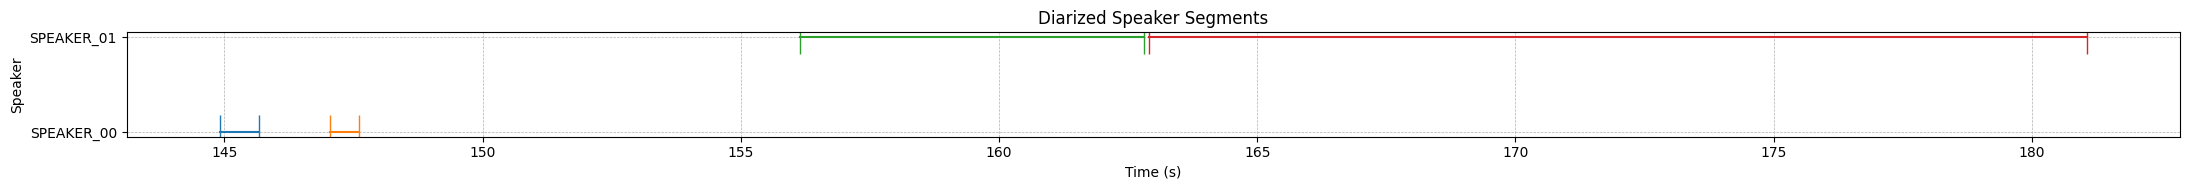

In [15]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


def plot_diarized_segments(diarize_df):
    # Ensure the data frame is sorted by start time
    diarize_df = diarize_df.sort_values(by='start')

    # Find unique speakers
    speakers = diarize_df['speaker'].unique()
    # Map speaker labels to y values
    y_values = {speaker: i for i, speaker in enumerate(speakers)}

    # Create the plot
    plt.figure(figsize=(22, 2))

    for _, row in diarize_df.iterrows():
        if row["start"] < 140 or row["start"] > 140 + 30:
            continue
        plt.plot([row['start'], row['end']], [y_values[row['speaker']]] * 2, marker='|', markersize=25,
                 label=row['speaker'])

    # Improve the plot
    plt.yticks(range(len(speakers)), speakers)
    plt.xlabel('Time (s)')
    plt.ylabel('Speaker')
    plt.title('Diarized Speaker Segments')
    #plt.legend(loc='upper right', title='Speakers')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    # Show the plot
    plt.show()


# Example usage
# Assuming `diarize_df` is the DataFrame you got from DiarizationPipeline
plot_diarized_segments(diarize_segments)
